In [54]:
pip install pywaffle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 15.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
from pywaffle import Waffle

In [5]:
patients=pd.read_csv("data/profil_patient.csv")

In [6]:
patients.head()

,CODE_PATIENT,date_h0,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,Mort,Nb_survie,Nb_hospit,CHOC,Nb_jours_sej,cat_age,cat_nb_hospit,cat_nb_jours_sej,cluster
0,P0,2011-11-22,1949,11,1,NaN,False,2596,9,False,23,1,1,1,0
1,P6,2013-12-05,1929,14,2,2015-03,True,456,8,False,51,2,1,1,1
2,P8,2015-07-02,1967,54,2,2015-08,True,41,3,True,43,0,1,1,2
3,P13,2011-05-19,1959,974,1,NaN,False,2783,2,False,3,0,1,0,3
4,P16,2010-03-18,1947,76,1,NaN,False,3210,9,False,28,1,1,1,0


[]

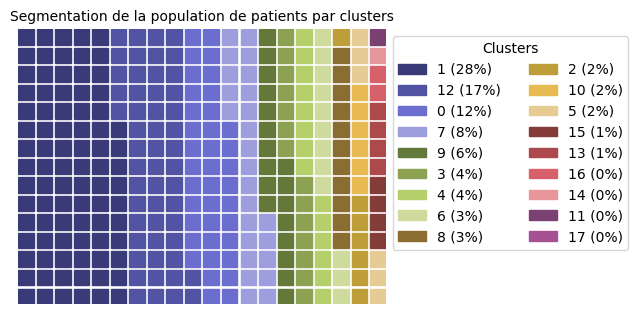

In [139]:
data=patients.groupby("cluster").count()["CODE_PATIENT"].sort_values(ascending=False)
plt.figure(
    FigureClass=Waffle,
    rows=15,
    columns=20,
    title={
        'label': 'Segmentation de la population de patients par clusters',
        'loc': 'center',
        'fontdict': {
            'fontsize': 10
        }},
    values=data,
    labels=[f"{k} ({int(v / sum(data) * 100)}%)" for k, v in data.items()],  # Legend would not be created without this line
    legend={'title': 'Clusters', 'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'ncol': 2,},
    cmap_name="tab20b"
)
plt.plot()

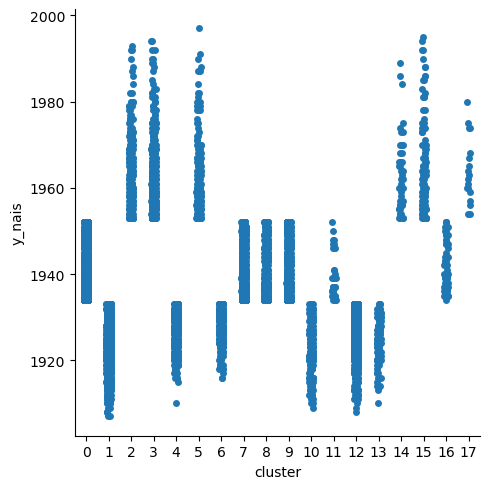

In [155]:
sns.catplot(data=patients, x="cluster", y="y_nais")

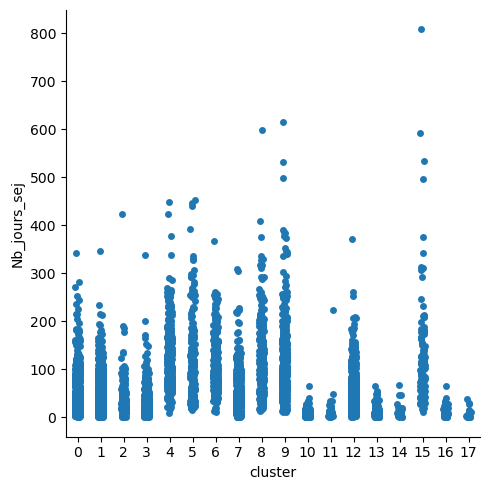

In [151]:
sns.catplot(data=patients, x="cluster", y="Nb_jours_sej")